<a href="https://colab.research.google.com/github/NikolasGialitsis/RNA_2D_struct/blob/master/RNA_fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find all optimal secondary structures of the RNA sequence AAUACUCCGUUGCAGCAU with the following simplified Zuker minimization algorithm. 

1

In [46]:
'''               i
      1   2   3   4   5   6   7
    1 0   0   0              X
    2 0   0   0   0   
    3 0   0   0   0   0       
j   4     0   0   0   0   0   
    5         0   0   0   0   0
    6             0   0   0   0
    7                 0   0   0
'''

import numpy as np
import math
import matplotlib.pyplot as plt

def initInfiniteArray(n):
  array = np.zeros((n,n))
  rows,cols = array.shape
  for i in range(rows):
    for j in range(cols):
      if j+const_dist > i:
        array[i,j] = np.inf
      else:
        array[i,j] = float("nan")
  return array

seq = 'AAUACUCCGUUGCAGCAU'
const_dist = 3
n = len(seq)
W = initInfiniteArray(n)
V = initInfiniteArray(n)

Traceback = np.array([str('') for x in range(n*n*4)]).reshape(n,n,4)


def compute_W(i,j):
  left = W[i-1,j]
  bottom = W[i,j+1]
  v_type = compute_V(i,j) 
  min_k_val = np.inf
  opt_k = -1
  for k in range(j+2,i):
    curr = W[i,k] + W[k-1,j]
    if  curr < min_k_val:
      min_k_val = curr
      opt_k = k
  W[i,j]  =  min(left,bottom,V[i,j],min_k_val)
  
  c = 0
  if W[i,j] == bottom:
    Traceback[i,j,c] = '↓'
    c+=1 
  if W[i,j] == left:
    Traceback[i,j,c] = '←'
    c+=1 
  if W[i,j] == V[i,j]:
    Traceback[i,j,c] = v_type
    c+=1
  if W[i,j] == min_k_val:
    Traceback[i,j,c] = str(opt_k)


def has_bond(base1,base2,bond):
  if base1+base2 == bond or base2+base1 == bond:
    return True
  else:
    return False
  

def s(i,j):
  base1 = seq[i]
  base2 = seq[j]
  WatsonCrick = ["GC","AU"]
  for bond in WatsonCrick:
    if has_bond(base1,base2,bond):
      return -4
  if has_bond(base1,base2,"GU"):
    return 0
  else:
    return 4

def h(i,j):
  if i > j:
    return i-j+3
  else:
    return 0

def compute_V(i,j):
  hairpin = s(i,j) + h(i-1,j+1)
  match = s(i,j) + W[i-1,j+1] 
  V[i,j] = min(hairpin,match)
  if V[i,j] == hairpin:
    return 'H'
  else:
    return '↙'


while(math.isnan(W[n-1,0])) :
  for i in range(n):
    for j in range(n):
      if j + const_dist <= i: 
        down = W[i,j+1]
        left = W[i-1,j]
        if math.isnan(down) or math.isnan(left):
          continue
        compute_W(i,j)


def backtrack(i,j,matches):
  for x in range(0,4):
    index = Traceback[i,j,x]
    if index == '':
      continue
    elif index == '←':
      backtrack(i,j-1,matches.copy())
    elif index  == '↓':
      backtrack(i+1,j,matches.copy())
    elif index == 'H':

      print('\nFolding Found!')
      print('Hairpin',(i,j))
      print_folding(matches)
    else:
      matches.append((i,j))
      backtrack(i+1,j-1,matches.copy())


def print_folding(matches):

  up = [seq[x[0]] for x in matches]
  down = [seq[x[1]] for x in matches]
  up_str = ''
  vert_str = ''
  for x in up:
    up_str += (' '+str(x) + ' ')
    vert_str += ' | '
  down_str = ''

  for x in down:
    down_str += (' '+str(x) + ' ')
  print('--- Matches ---')
  print(matches)
  print(up_str)
  print(vert_str)
  print(down_str)


print('\n=============================================\n===================== W =====================')
print(W.transpose(1,0))
print('')
print('\n=============================================\n===================== V =====================')
print(V.transpose(1,0))
print('')

print('\n=============================================\n====================TRACEBACK===================')
Traceback = Traceback.transpose(1,0,2)
backtrack(0,n-1,[].copy())




===================== W =====================
[[ inf  inf  inf   8.   8.   1.   1.   1.   1.  -3.  -7.  -7.  -7.  -7.
   -7.  -7. -11. -15.]
 [ inf  inf  inf  inf   8.   1.   1.   1.   1.  -3.  -7.  -7.  -7.  -7.
   -7.  -7. -11. -15.]
 [ inf  inf  inf  inf  inf   8.   8.   8.   1.  -3.  -3.  -3.  -3.  -7.
   -7.  -7. -11. -12.]
 [ inf  inf  inf  inf  inf  inf   8.   8.   1.  -3.  -3.  -3.  -3.  -3.
   -7.  -7.  -8. -12.]
 [ inf  inf  inf  inf  inf  inf  inf   8.   1.   1.   1.   0.   0.  -3.
   -7.  -7.  -8.  -8.]
 [ inf  inf  inf  inf  inf  inf  inf  inf   4.   4.   4.   1.   1.  -3.
   -4.  -4.  -8.  -8.]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf   8.   8.   1.   1.   0.
   -4.  -4.  -4.  -4.]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf   8.   1.   1.   0.
   -4.  -4.  -4.  -4.]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf   8.   1.   0.
    0.  -4.  -4.  -4.]
 [ inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf  inf   8.   0.
    0.   0.  -4.  -4.]
 [ 

In [47]:

import numpy as np
import math


Traceback = np.array([str('') for x in range(n*n*4)]).reshape(n,n,4)
const_dist = 5
n = len(seq)
W = initInfiniteArray(n)
V = initInfiniteArray(n)

def h(i,j):
  if i > j:
    return 2*(i-j+5)
  else:
    assert(1==0)

while(math.isnan(W[n-1,0])) :
  for i in range(n):
    for j in range(n):
      if j + const_dist <= i: 
        down = W[i,j+1]
        left = W[i-1,j]
        if math.isnan(down) or math.isnan(left):
          continue
        compute_W(i,j)

print('\n=============================================\n===================== W =====================')
print(W.transpose(1,0))
print('')
print('\n=============================================\n===================== V =====================')
print(V.transpose(1,0))
print('')
print('\n=============================================\n====================TRACEBACK===================')
Traceback = Traceback.transpose(1,0,2)
backtrack(0,n-1,[].copy())



===================== W =====================
[[inf inf inf inf inf 12. 12. 12. 12. 12. 10. 10. 10.  8.  4.  4.  0. -4.]
 [inf inf inf inf inf inf 20. 20. 18. 14. 10. 10. 10.  8.  4.  4.  0. -4.]
 [inf inf inf inf inf inf inf 20. 18. 14. 14. 12. 12.  8.  4.  4.  0.  0.]
 [inf inf inf inf inf inf inf inf 20. 14. 14. 12. 12.  8.  4.  4.  4.  0.]
 [inf inf inf inf inf inf inf inf inf 20. 20. 12. 12.  8.  4.  4.  4.  4.]
 [inf inf inf inf inf inf inf inf inf inf 20. 12. 12.  8.  8.  8.  8.  8.]
 [inf inf inf inf inf inf inf inf inf inf inf 12. 12. 12. 12. 12. 12. 12.]
 [inf inf inf inf inf inf inf inf inf inf inf inf 20. 20. 16. 12. 12. 12.]
 [inf inf inf inf inf inf inf inf inf inf inf inf inf 20. 16. 12. 12. 12.]
 [inf inf inf inf inf inf inf inf inf inf inf inf inf inf 16. 16. 14. 14.]
 [inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf 20. 14. 14.]
 [inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf 20. 18.]
 [inf inf inf inf inf inf inf inf inf inf inf inf inf

#C-RMSD

In [0]:
import numpy as np



def euclidean_norm_power2(a,b):
  dim = len(a)
  assert(dim > 0)
  assert(dim == len(b))
  sum_sqrts = 0
  for d in range(dim):
    sum_sqrts += ((a[d] - b[d])*(a[d] - b[d]))
  assert(sum_sqrts >= 0)
  return sum_sqrts

def cRMSD(listX,listY):
  assert(len(listX) == len(listY))
  n = len(listX)
  assert(n > 0)
  sum_atoms = 0
  for ident in range(n):
    x = listX[ident]
    y = listY[ident]
    sum_atoms += euclidean_norm_power2(x,y)
  
  return np.sqrt(sum_atoms/n)

def getCentroid(atomsList):
  sum_atoms = []
  n = len(atomsList)
  dims = len(atomsList[0])
  for dim in range(dims):
    sum_atoms.append(np.array([atom[dim] for atom in atomsList]).sum()/n)
  return sum_atoms

def translateOrigin(atomsList):
  centroid = getCentroid(atomsList)
  for x in atomsList:
    for d in range(len(x)):
      x[d] -= centroid[d]

def GetImproved_cRMSD(X,Y):
  translateOrigin(X)
  translateOrigin(Y)
  XY = np.matmul(X.transpose(),Y)
  SVD = np.linalg.svd(XY)
  U = SVD[0]
  Sigma = SVD[1]
  V = SVD[2]

  assert(U.shape == (3 , 3))
  assert(Sigma.shape == (3,))
  assert(V.shape == (3 , 3))
  Q = np.matmul(U,V)
 
  detQ = np.linalg.det(Q)
  if detQ < 0:
    U[2] = -U[2]
    Q = np.matmul(U,V)
    detQ = np.linalg.det(Q)
    assert(detQ >= 0)

  XQ = np.matmul(X,Q)
  final = cRMSD(XQ,Y)
  assert(final != float("inf"))
  assert(final != float("-inf"))
  assert(final >= 0)
  return final

conformations = open('/content/80_conformations.txt', 'r+')
nconf = int(conformations.readline())
natoms = int(conformations.readline())


def getNextConf():
  conf = []
  for i in range(natoms):
    line = conformations.readline()
    coords = line.split()
    atom = []
    for coord in coords:
      atom.append(float(coord))
    assert(len(atom) == 3)
    conf.append(atom)
  return conf

CONF = []

confA = getNextConf()
confB = getNextConf()
out = GetImproved_cRMSD(np.array(confA),np.array(confB))
print(out)

CONF.append(confA)
CONF.append(confB)





0.6271694758794248


Mean :  11.015199832626305
Median:  10.853087486496054


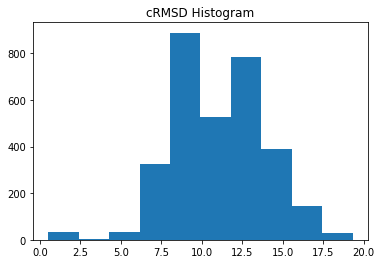

In [0]:
while(len(CONF) != nconf):
  CONF.append(getNextConf())


DISTS = np.zeros((nconf,nconf))
dist_vect = []
for i in range(nconf):
  for j in range(nconf):
    if j <= i:
      DISTS[i,j] = np.inf
    else:
      DISTS[i,j] = GetImproved_cRMSD(np.array(CONF[i]),np.array(CONF[j]))
      dist_vect.append(DISTS[i,j])

print('Mean : ',np.mean(dist_vect))
print('Median: ',np.median(dist_vect))



plt.hist(dist_vect,bins=10,range=(np.min(dist_vect),np.max(dist_vect)))
plt.title("cRMSD Histogram")
plt.show()




## d-RMSD


Mean :  6.7950321975044385
Median:  6.468606946347217


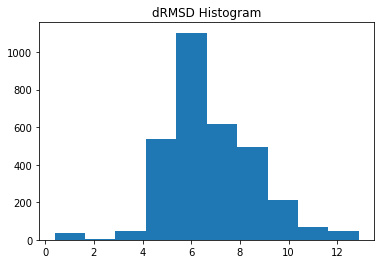

In [0]:
import matplotlib.pyplot as plt

def euclidean_dist(x,y):
    return np.sqrt(np.sum((x - y)** 2))

def getDistancesVector(conf):
  DISTS = np.zeros((natoms,natoms))
  dist_vect = []
  for i in range(natoms):
    for j in range(natoms):
      if j > i:
        atom_a = conf[i]
        atom_b = conf[j]
        dist = euclidean_dist(atom_a,atom_b)
        dist_vect.append(dist)
  return np.array(dist_vect)    

def dRMSD(conf1,conf2):
  DistanceVector1 = getDistancesVector(conf1)
  DistanceVector2 = getDistancesVector(conf2)
  k = len(DistanceVector1)
  assert(k==len(DistanceVector2))
  sum_diff = 0
  for index in range(k):
    sum_diff += ((DistanceVector1[index] - DistanceVector2[index])**2)
  return np.sqrt(sum_diff/k)

DISTS = np.zeros((nconf,nconf))
dist_vect = []
for i in range(nconf):
  for j in range(nconf):
    if j <= i:
      DISTS[i,j] = np.inf
    else:
      DISTS[i,j] = dRMSD(np.array(CONF[i]),np.array(CONF[j]))
      dist_vect.append(DISTS[i,j])

print('Mean : ',np.mean(dist_vect))
print('Median: ',np.median(dist_vect))
plt.hist(dist_vect,bins=10,range=(np.min(dist_vect),np.max(dist_vect)))
plt.title("dRMSD Histogram")
plt.show()


